Processed text (lowercase, no punctuation):
space exploration is one of humanitys most exciting endeavors the vastness of the universe holds countless mysteries waiting to be uncovered from the first moon landing to the stunning images from the james webb telescope each discovery expands our understanding missions to mars and beyond push the boundaries of science and technology the possibility of finding extraterrestrial life fuels our imagination exploring space reminds us how small yet remarkable we are in the cosmic scale


Word tokens:
['space', 'exploration', 'is', 'one', 'of', 'humanitys', 'most', 'exciting', 'endeavors', 'the', 'vastness', 'of', 'the', 'universe', 'holds', 'countless', 'mysteries', 'waiting', 'to', 'be', 'uncovered', 'from', 'the', 'first', 'moon', 'landing', 'to', 'the', 'stunning', 'images', 'from', 'the', 'james', 'webb', 'telescope', 'each', 'discovery', 'expands', 'our', 'understanding', 'missions', 'to', 'mars', 'and', 'beyond', 'push', 'the', 'boundaries'

<Axes: title={'center': 'Top 10 Word Frequency Distribution'}, xlabel='Samples', ylabel='Counts'>

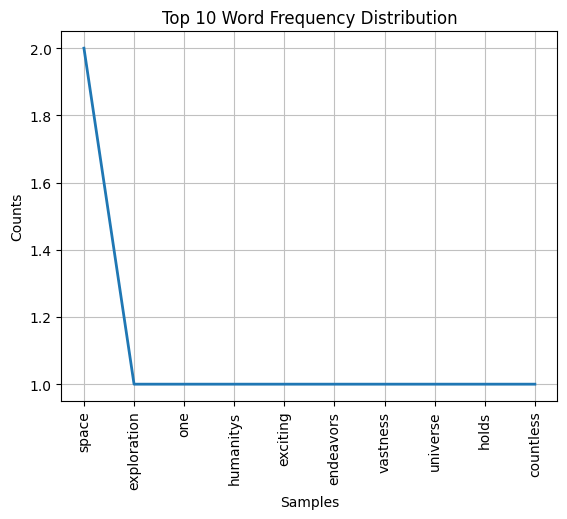

In [5]:
'''Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuaƟon.
2. Tokenize the text into words and sentences.
3. Remove stopwords (using NLTK's stopwords list).
4. Display word frequency distribuƟon (excluding stopwords).'''
# Install NLTK and all required resources
!pip install nltk
import nltk

# Download ALL necessary NLTK data (this ensures we get punkt_tab)
nltk.download('all', quiet=True)  # quiet=True suppresses the download messages

# Now proceed with the rest of the code
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string

# The original text
text = """Space exploration is one of humanity's most exciting endeavors. The vastness of the universe holds countless mysteries waiting to be uncovered. From the first moon landing to the stunning images from the James Webb Telescope, each discovery expands our understanding. Missions to Mars and beyond push the boundaries of science and technology. The possibility of finding extraterrestrial life fuels our imagination. Exploring space reminds us how small yet remarkable we are in the cosmic scale."""

# 1. Convert to lowercase and remove punctuation
text_lower = text.lower()
text_no_punct = text_lower.translate(str.maketrans('', '', string.punctuation))

print("Processed text (lowercase, no punctuation):")
print(text_no_punct)
print("\n")

# 2. Tokenize into words and sentences
words = word_tokenize(text_no_punct)
sentences = sent_tokenize(text)

print("Word tokens:")
print(words)
print("\nSentence tokens:")
print(sentences)
print("\n")

# 3. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

print("Words after removing stopwords:")
print(filtered_words)
print("\n")

# 4. Display word frequency distribution
fdist = FreqDist(filtered_words)

print("Word frequency distribution (excluding stopwords):")
print(fdist.most_common())
print("\n")

# Plot the frequency distribution
fdist.plot(10, title='Top 10 Word Frequency Distribution')

In [6]:
'''Q2: Stemming and LemmaƟzaƟon
1. Take the tokenized words from QuesƟon 1 (aŌer stopword removal).
2. Apply stemming using NLTK's PorterStemmer and LancasterStemmer.
3. Apply lemmaƟzaƟon using NLTK's WordNetLemmaƟzer.
4. Compare and display results of both techniques. '''

# Install NLTK if not already installed
!pip install nltk

import nltk
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

# Download required NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Get the filtered_words from Q1 (after stopword removal)
filtered_words = ['space', 'exploration', 'one', 'humanitys', 'exciting', 'endeavors',
                 'vastness', 'universe', 'holds', 'countless', 'mysteries', 'waiting',
                 'uncovered', 'first', 'moon', 'landing', 'stunning', 'images',
                 'james', 'webb', 'telescope', 'discovery', 'expands', 'understanding',
                 'missions', 'mars', 'beyond', 'push', 'boundaries', 'science',
                 'technology', 'posibility', 'finding', 'extraterrestrial', 'life',
                 'fuels', 'imagination', 'exploring', 'space', 'reminds', 'us',
                 'small', 'yet', 'remarkable', 'cosmic', 'scale']

# Initialize stemmers and lemmatizer
porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming and lemmatization
porter_stems = [porter.stem(word) for word in filtered_words]
lancaster_stems = [lancaster.stem(word) for word in filtered_words]
lemmas = [lemmatizer.lemmatize(word) for word in filtered_words]

# Create comparison table
print(f"{'Original':<20} {'Porter Stem':<20} {'Lancaster Stem':<20} {'Lemma':<20}")
print("-" * 80)
for original, p_stem, l_stem, lemma in zip(filtered_words, porter_stems, lancaster_stems, lemmas):
    print(f"{original:<20} {p_stem:<20} {l_stem:<20} {lemma:<20}")

# Additional analysis
print("\nComparison Insights:")
print("- Porter Stemmer tends to be less aggressive, often leaving recognizable word fragments")
print("- Lancaster Stemmer is more aggressive, often producing shorter stems")
print("- Lemmatization provides actual dictionary words (lemmas) rather than just stems")
print("- Note how 'exciting' becomes 'excit' (Porter) vs 'excit' (Lancaster) vs 'exciting' (Lemma)")
print("- 'understanding' becomes 'understand' for all techniques in this case")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Original             Porter Stem          Lancaster Stem       Lemma               
--------------------------------------------------------------------------------
space                space                spac                 space               
exploration          explor               expl                 exploration         
one                  one                  on                   one                 
humanitys            human                hum                  humanity            
exciting             excit                excit                exciting            
endeavors            endeavor             endeav               endeavor            
vastness             vast                 vast                 vastness            
universe             univers              univers              universe            
holds                hold                 hold                 hold                
countless            countless            countless            countless       

In [7]:
'''Q3. Regular Expressions and Text Spliƫng
1. Take their original text from QuesƟon 1.
2. Use regular expressions to:
a. Extract all words with more than 5 leƩers.
b. Extract all numbers (if any exist in their text).
c. Extract all capitalized words.
3. Use text spliƫng techniques to:
a. Split the text into words containing only alphabets (removing digits and special
characters).
b. Extract words starƟng with a vowel.'''

import re

# Original text from Q1
text = """Space exploration is one of humanity's most exciting endeavors. The vastness of the universe holds countless mysteries waiting to be uncovered. From the first moon landing to the stunning images from the James Webb Telescope, each discovery expands our understanding. Missions to Mars and beyond push the boundaries of science and technology. The possibility of finding extraterrestrial life fuels our imagination. Exploring space reminds us how small yet remarkable we are in the cosmic scale."""

print("=== Original Text ===")
print(text)
print("\n")

# 2. Regular Expression Tasks
print("=== Regular Expression Results ===")
# 2a. Words with more than 5 letters
long_words = re.findall(r'\b\w{6,}\b', text)
print("a) Words with >5 letters:", long_words)

# 2b. Extract all numbers (though none exist in this text)
numbers = re.findall(r'\d+', text)
print("b) Numbers found:", numbers if numbers else "No numbers found")

# 2c. Extract all capitalized words
capitalized_words = re.findall(r'\b[A-Z][a-z]+\b', text)
print("c) Capitalized words:", capitalized_words)
print("\n")

# 3. Text Splitting Tasks
print("=== Text Splitting Results ===")
# 3a. Split into words containing only alphabets
alpha_only_words = re.findall(r'\b[a-zA-Z]+\b', text)
print("a) Alphabet-only words:", alpha_only_words)

# 3b. Words starting with vowels
vowel_start_words = re.findall(r'\b[aeiouAEIOU][a-zA-Z]*\b', text)
print("b) Words starting with vowels:", vowel_start_words)

=== Original Text ===
Space exploration is one of humanity's most exciting endeavors. The vastness of the universe holds countless mysteries waiting to be uncovered. From the first moon landing to the stunning images from the James Webb Telescope, each discovery expands our understanding. Missions to Mars and beyond push the boundaries of science and technology. The possibility of finding extraterrestrial life fuels our imagination. Exploring space reminds us how small yet remarkable we are in the cosmic scale.


=== Regular Expression Results ===
a) Words with >5 letters: ['exploration', 'humanity', 'exciting', 'endeavors', 'vastness', 'universe', 'countless', 'mysteries', 'waiting', 'uncovered', 'landing', 'stunning', 'images', 'Telescope', 'discovery', 'expands', 'understanding', 'Missions', 'beyond', 'boundaries', 'science', 'technology', 'possibility', 'finding', 'extraterrestrial', 'imagination', 'Exploring', 'reminds', 'remarkable', 'cosmic']
b) Numbers found: No numbers found
c

In [8]:
'''Q4. Custom TokenizaƟon & Regex-based Text Cleaning
1. Take original text from QuesƟon 1.
2. Write a custom tokenizaƟon funcƟon that:
a. Removes punctuaƟon and special symbols, but keeps contracƟons (e.g.,
"isn't" should not be split into "is" and "n't").
b. Handles hyphenated words as a single token (e.g., "state-of-the-art" remains
a single token).
c. Tokenizes numbers separately but keeps decimal numbers intact (e.g., "3.14"
should remain as is).
3. Use Regex SubsƟtuƟons (re.sub) to:
a. Replace email addresses with '<EMAIL>' placeholder.
b. Replace URLs with '<URL>' placeholder.
c. Replace phone numbers (formats: 123-456-7890 or +91 9876543210) with
'<PHONE>' placeholder. '''
import re

# Original text from Q1 (with added test cases)
text = """Space exploration is one of humanity's most exciting endeavors. The vastness of the universe holds countless mysteries waiting to be uncovered.
From the first moon landing to the stunning images from the James Webb Telescope (costing $10.5 million), each discovery expands our understanding.
Contact us at info@space.com or visit https://space-exploration.org. Call +91 9876543210 or 123-456-7890 for inquiries.
State-of-the-art technology isn't cheap, but 3.14 is pi's approximate value."""

print("=== Original Text ===")
print(text)
print("\n")

# 2. Custom Tokenization Function
def custom_tokenizer(text):
    # Pattern explanation:
    # 1. \w+(?:'\w+)?    - Matches words with contractions (e.g., "isn't")
    # 2. |\w+-\w+(?:-\w+)* - Matches hyphenated words (e.g., "state-of-the-art")
    # 3. |\d+\.\d+       - Matches decimal numbers (e.g., 3.14)
    # 4. |\d+            - Matches integers
    # 5. |[^\w\s]        - Matches remaining special characters (to be removed)
    pattern = r"""
        \w+(?:'\w+)?           # Words with contractions
        |\w+-\w+(?:-\w+)*      # Hyphenated words
        |\d+\.\d+              # Decimal numbers
        |\d+                   # Integers
        |[^\w\s]               # Special characters (to remove)
    """
    tokens = re.findall(pattern, text, re.VERBOSE)
    # Filter out single special characters while keeping valid tokens
    return [token for token in tokens if re.match(r'(\w+|\d)', token)]

print("=== Custom Tokenization ===")
tokens = custom_tokenizer(text)
print("Tokens:", tokens)
print("\n")

# 3. Regex Substitutions
def clean_text(text):
    # Email replacement
    text = re.sub(r'\b[\w.-]+@[\w.-]+\.\w+\b', '<EMAIL>', text)
    # URL replacement
    text = re.sub(r'https?://\S+|www\.\S+', '<URL>', text)
    # Phone number replacement (formats: 123-456-7890 or +91 9876543210)
    text = re.sub(r'(\+\d{1,3}\s?\d{5,15}|\d{3}-\d{3}-\d{4})', '<PHONE>', text)
    return text

print("=== Cleaned Text with Placeholders ===")
cleaned_text = clean_text(text)
print(cleaned_text)

=== Original Text ===
Space exploration is one of humanity's most exciting endeavors. The vastness of the universe holds countless mysteries waiting to be uncovered. 
From the first moon landing to the stunning images from the James Webb Telescope (costing $10.5 million), each discovery expands our understanding. 
Contact us at info@space.com or visit https://space-exploration.org. Call +91 9876543210 or 123-456-7890 for inquiries. 
State-of-the-art technology isn't cheap, but 3.14 is pi's approximate value.


=== Custom Tokenization ===
Tokens: ['Space', 'exploration', 'is', 'one', 'of', "humanity's", 'most', 'exciting', 'endeavors', 'The', 'vastness', 'of', 'the', 'universe', 'holds', 'countless', 'mysteries', 'waiting', 'to', 'be', 'uncovered', 'From', 'the', 'first', 'moon', 'landing', 'to', 'the', 'stunning', 'images', 'from', 'the', 'James', 'Webb', 'Telescope', 'costing', '10', '5', 'million', 'each', 'discovery', 'expands', 'our', 'understanding', 'Contact', 'us', 'at', 'info',